# Transformer公开课（4）
# Decoder-Only架构与文字生成案例数据处理
#### @菜菜TsaiTsai

## 课程目录

<font color="red">**红色为本节公开课内容，其他为付费正课《深度学习实战》课程内容。加vx号littlecat_1201回复“优惠”，即可了解正课哦！**</font><br>

**0 前言**<br>
&nbsp;&nbsp;&nbsp;&nbsp;0.1 Transformer模型的地位与发展历程<br>
&nbsp;&nbsp;&nbsp;&nbsp;0.2 序列模型的基本思路与根本诉求<br>

**1 注意力机制**<br>
&nbsp;&nbsp;&nbsp;&nbsp;1.1 注意力机制的本质<br>
&nbsp;&nbsp;&nbsp;&nbsp;1.2 Transformer中的自注意力机制运算流程<br>
&nbsp;&nbsp;&nbsp;&nbsp;1.3 Multi-Head Attention 多头注意力机制
<br>

**2 Transformer的基本结构**<br>
&nbsp;&nbsp;&nbsp;&nbsp;2.1 Embedding层与位置编码技术<br>
&nbsp;&nbsp;&nbsp;&nbsp;2.2 Encoder结构解析<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.1 残差连接<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.2 Layer Normalization层归一化<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.3 Feed-Forward Networks前馈网络<br>
&nbsp;&nbsp;&nbsp;&nbsp;2.3 Decoder结构解析<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.3.1 完整Transformer与Decoder-Only结构的数据流<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.3.2 Encoder-Decoder结构中的Decoder<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.3.2.1 输入与teacher forcing<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.3.2.2 掩码注意力机制<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.3.2.3 普通掩码与前馈掩码<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.3.2.4 编码器-解码器注意力层<br>
<font color="red">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.3.3 Decoder-Only结构中的Decoder<br></font>

**3 Transformer的PyTorch实战**<br>
&nbsp;&nbsp;&nbsp;&nbsp;3.1 PyTorch中的Transformer层<br>
&nbsp;&nbsp;&nbsp;&nbsp;3.2 Encoder-Only任务下的Trnasformer实战<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2.1 Encoder-Only任务下的Transformer架构<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2.1.1 Embedding层与Encoder数据输入<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2.1.2 位置编码的实现与技巧<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2.1.3 从0实现编码器Only架构<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2.2 【实战】Transformer的情感分类案例<br>
&nbsp;&nbsp;&nbsp;&nbsp;3.3【实战】Decoder-Only架构下的文字生成案例<br>
<font color="red">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.3.1 数据导入与数据预处理<br></font>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.3.2 Decoder-Only Transformer的架构<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.3.3 生成式算法的预测与训练<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.3.4 生成式模型的改进<br>
&nbsp;&nbsp;&nbsp;&nbsp;3.4 Huggingface入门与调用<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.4.1 Huggingface入门与官网使用指南<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.4.2 加载并使用预训练模型<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.4.3 词嵌入工具与词嵌入模型<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.4.4 全流程自动化的Pipelines工具<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.4.5 Huggingface中的模型微调<br>
&nbsp;&nbsp;&nbsp;&nbsp;3.4 【实战】Transformer的机器翻译案例<br>
&nbsp;&nbsp;&nbsp;&nbsp;3.5 【实战】Transformer的时间序列案例<br>

### 2.3.3 Decoder-Only结构中的Decoder

现在，让我们来看看Decoder-only结构下的Decoder。在Decoder-only结构下的Decoder是专用于生成式任务的架构，它从整个Transformer结构中抽离出来、有独特的训练流程与结构。我们先从结构来看——

<center><img src="https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/transformer/IUCxP.png" alt="描述文字" width="300">

In [ ]:
训练——（teacher forcing - 不会累计错误）

这是最好的时代 👉 xxx

这是最好的时代，这 👉 xxx

这是最好的时代，这是 👉 xxx

测试——（autoregressive - 累计错误）

这是最坏的时代 👉 xxx

这是最坏的时代，xxx 👉 xxx

这是最坏的时代，xxxxxx 👉 xxx

如图所示，与原本的Decoder结构相比，Decoder-only状态下的Decoder不再存在编码器-解码器注意力层，整个结构会变得更像编码器Encoder，但依然保留着Teacher forcing和掩码机制。由于没有了编码器-解码器注意力层，因此原本依赖于编码器-解码器注意力层完成的整套训练和运算流程也都不再有效了，相对的，在Decoder-only结构中的Decoder大部分时候都采用“自回归”的训练流程——自回归流程在时间序列预测中是一种常用的方法，它逐步生成未来的值，每一步的预测依赖于前一步的实际值或预测值，而Decoder-only状态下的训练、预测流程都是这样的流程。**在自回归场景中，Decoder的任务是——**

1. **利用序列的前半段预测序列的后半段**，因此Decoder的输入数据是一段时间序列、一段文字，输出的是对未来时间的预测、对未来文字的填补<br><br>

2. **利用teacher forcing机制和自回归机制的本质，在训练和预测流程中使用标签来辅助预测**。具体地来说，在训练流程中，Decoder利用teacher forcing机制、不断将正确的标签作为特征数据使用；在测试流程中，Decoder利用自回归的属性，将前一步的预测值作为特征数据来使用。

<font color="red">**在生成式任务中，一般我们不再区分“特征和标签”这两种不同的数据，在大多数生成式任务中，我们有且只有一种数据——就是需要继续生成、继续补充的那段序列**</font>。生成式任务带有一定的“自监督”属性，我们训练用的数据、和要预测的数据都来自于同一段序列，因此标签数据在下一个时间步就会成为我们的特征数据，故而我们也不会特地再去区分特征和标签、而是会区分“输入”与“输出”。不过，从架构图上来看，除了要预测的序列本身之外，我们依然也可以给Decoder输入更多额外的信息（图上的inputs部分）。大部分时候，我们可以使用这条数据流线路向Decoder传递一些相应的“条件”与“背景知识”，可以帮助我们更好地进行信息的生成和填补。

具体来看，Decoder-only状态下的<font color="red">**训练流程**</font>如下，假设需要预测的序列为y，编码好的结果为ebd_y，其中我们取ebd_y的前n个字符作为输入，n个字符后的字符作为标签：

In [ ]:
训练——（teacher forcing - 不会累计错误）

这是最好的时代 👉 xxx

这是最好的时代，这 👉 xxx

这是最好的时代，这是 👉 xxx

测试——（autoregressive - 累计错误）

这是最坏的时代 👉 xxx

这是最坏的时代，xxx 👉 xxx

这是最坏的时代，xxxxxx 👉 xxx

- **第1步，输入 ebd_y[0] >> 输出预测标签yhat[0]，对应真实标签y[0]**

<table>
  <tr>
    <td>
      <p>输入Decoder<br>序列的前半段</p>
      <table style="color:red;">
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>0</td><td>"sos"</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
      </table>
    </td>
    <td><p>预测出</p>➡
    </td>
    <td>
      <p>当前时间步的预测标签yhat</p>
      <table>
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>0</td><td>yyy</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
      </table>
    </td>
    <td><p>对应</p>➡
    </td>
    <td>
      <p>真实标签y<br>序列的后半段</p>
      <table>
        <tr>
          <th>索引</th><th></th>
        </tr>
        <tr style="color:blue;">
          <td>0</td><td>这</td>
        </tr>
        <tr>
          <td>1</td><td>是</td>
        </tr>
        <tr>
          <td>2</td><td>最好的</td>
        </tr>
        <tr>
          <td>3</td><td>时代</td>
        </tr>
        <tr>
          <td>4</td><td>这</td>
        </tr>
        <tr>
          <td>5</td><td>是</td>
        </tr>
        <tr>
          <td>6</td><td>最坏的</td>
        </tr>
        <tr>
          <td>7</td><td>时代</td>
        </tr>
        <tr>
          <td>8</td><td>"eos"</td>
        </tr>
      </table>
    </td>
  </tr>
</table>

……
- **第n+1步，输入 ebd_y[:n] >> 输出预测标签yhat[n]，对应真实标签y[n]**

<table>
  <tr>
    <td>
      <p>输入Decoder<br>序列的前半段</p>
      <table style="color:red;">
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>0</td><td>"sos"</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>1</td><td>这</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>2</td><td>是</td><td>0.1721</td><td>0.5030</td><td>0.8948</td><td>0.2385</td><td>0.0987</td>
        </tr>
        <tr>
          <td>3</td><td>最好的</td><td>0.1342</td><td>0.8297</td><td>0.2978</td><td>0.7120</td><td>0.2565</td>
        </tr>
        <tr>
          <td>4</td><td>时代</td><td>0.1248</td><td>0.5003</td><td>0.7559</td><td>0.4804</td><td>0.2593</td>
        </tr>
      </table>
    </td>
    <td><p>预测出</p>➡
    </td>
    <td>
      <p>当前时间步的预测标签yhat</p>
      <table>
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>4</td><td>yyy</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
      </table>
    </td>
    <td><p>对应</p>➡
    </td>
    <td>
    <p>真实标签y<br>序列的后半段</p>
      <table>
        <tr>
          <th>索引</th><th></th>
        </tr>
        <tr>
          <td>0</td><td>这</td>
        </tr>
        <tr>
          <td>1</td><td>是</td>
        </tr>
        <tr>
          <td>2</td><td>最好的</td>
        </tr>
        <tr>
          <td>3</td><td>时代</td>
        </tr>
        <tr style="color:blue;">
          <td>4</td><td>这</td>
        </tr>
        <tr>
          <td>5</td><td>是</td>
        </tr>
        <tr>
          <td>6</td><td>最坏的</td>
        </tr>
        <tr>
          <td>7</td><td>时代</td>
        </tr>
        <tr>
          <td>8</td><td>"eos"</td>
        </tr>
      </table>
    </td>
  </tr>
</table>

- **第n+2步，输入 ebd_y[:n+1] >> 输出预测标签yhat[n+1]，对应真实标签y[n+1]**

<table>
  <tr>
    <td>
      <p>输入Decoder<br>序列的前半段</p>
      <table style="color:red;">
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>0</td><td>"sos"</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>1</td><td>这</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>2</td><td>是</td><td>0.1721</td><td>0.5030</td><td>0.8948</td><td>0.2385</td><td>0.0987</td>
        </tr>
        <tr>
          <td>3</td><td>最好的</td><td>0.1342</td><td>0.8297</td><td>0.2978</td><td>0.7120</td><td>0.2565</td>
        </tr>
        <tr>
          <td>4</td><td>时代</td><td>0.1248</td><td>0.5003</td><td>0.7559</td><td>0.4804</td><td>0.2593</td>
        </tr>
        <tr>
          <td>5</td><td>这</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
      </table>
    </td>
    <td><p>预测出</p>➡
    </td>
    <td>
      <p>当前时间步的预测标签yhat</p>
      <table>
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>5</td><td>yyy</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
      </table>
    </td>
    <td><p>对应</p>➡
    </td>
    <td>
      <p>真实标签y<br>序列的后半段</p>
      <table>
        <tr>
          <th>索引</th><th></th>
        </tr>
        <tr>
          <td>0</td><td>这</td>
        </tr>
        <tr>
          <td>1</td><td>是</td>
        </tr>
        <tr>
          <td>2</td><td>最好的</td>
        </tr>
        <tr>
          <td>3</td><td>时代</td>
        </tr>
        <tr>
          <td>4</td><td>这</td>
        </tr>
        <tr style="color:blue;">
          <td>5</td><td>是</td>
        </tr>
        <tr>
          <td>6</td><td>最坏的</td>
        </tr>
        <tr>
          <td>7</td><td>时代</td>
        </tr>
        <tr>
          <td>8</td><td>"eos"</td>
        </tr>
      </table>
    </td>
  </tr>
</table>

- **第n+3步，输入 ebd_y[:n+2] >> 输出预测标签yhat[n+2]，对应真实标签y[n+2]**

<table>
  <tr>
    <td>
      <p>输入Decoder<br>序列的前半段</p>
      <table style="color:red;">
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>0</td><td>"sos"</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>1</td><td>这</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>2</td><td>是</td><td>0.1721</td><td>0.5030</td><td>0.8948</td><td>0.2385</td><td>0.0987</td>
        </tr>
        <tr>
          <td>3</td><td>最好的</td><td>0.1342</td><td>0.8297</td><td>0.2978</td><td>0.7120</td><td>0.2565</td>
        </tr>
        <tr>
          <td>4</td><td>时代</td><td>0.1248</td><td>0.5003</td><td>0.7559</td><td>0.4804</td><td>0.2593</td>
        </tr>
        <tr>
          <td>5</td><td>这</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>6</td><td>是</td><td>0.1721</td><td>0.5030</td><td>0.8948</td><td>0.2385</td><td>0.0987</td>
        </tr>
      </table>
    </td>
    <td><p>预测出</p>➡
    </td>
    <td>
      <p>当前时间步的预测标签yhat</p>
      <table>
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>6</td><td>yyy</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
      </table>
    </td>
    <td><p>对应</p>➡
    </td>
    <td>
      <p>真实标签y<br>序列的后半段</p>
      <table>
        <tr>
          <th>索引</th><th></th>
        </tr>
        <tr>
          <td>0</td><td>这</td>
        </tr>
        <tr>
          <td>1</td><td>是</td>
        </tr>
        <tr>
          <td>2</td><td>最好的</td>
        </tr>
        <tr>
          <td>3</td><td>时代</td>
        </tr>
        <tr>
          <td>4</td><td>这</td>
        </tr>
        <tr>
          <td>5</td><td>是</td>
        </tr>
        <tr style="color:blue;">
          <td>6</td><td>最坏的</td>
        </tr>
        <tr>
          <td>7</td><td>时代</td>
        </tr>
        <tr>
          <td>8</td><td>"eos"</td>
        </tr>
      </table>
    </td>
  </tr>
</table>

而在<font color="red">**推理流程**</font>中，Decoder中运行的流程如下所示——

- **第一步，输入 ebd_y（全部的数据） >> 输出下一步的预测标签**

<table>
  <tr>
    <td>
      <p>输入Decoder<br>全部的序列</p>
      <table style="color:red;">
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>0</td><td>这</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>1</td><td>是</td><td>0.1721</td><td>0.5030</td><td>0.8948</td><td>0.2385</td><td>0.0987</td>
        </tr>
        <tr>
          <td>2</td><td>最好的</td><td>0.1342</td><td>0.8297</td><td>0.2978</td><td>0.7120</td><td>0.2565</td>
        </tr>
        <tr>
          <td>3</td><td>时代</td><td>0.1248</td><td>0.5003</td><td>0.7559</td><td>0.4804</td><td>0.2593</td>
        </tr>
      </table>
    </td>
    <td><p>预测出</p>➡
    </td>
    <td>
      <p>当前时间步的预测标签yhat</p>
      <table>
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>4</td><td>yyy</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
      </table>
    </td>
  </tr>
</table>

- **第二步，输入 ebd_y（全部的数据）+ 预测的yhat >> 输出下一步的预测标签**

<table>
  <tr>
    <td>
      <p>输入Decoder<br>全部的序列</p>
      <table style="color:red;">
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>0</td><td>这</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>1</td><td>是</td><td>0.1721</td><td>0.5030</td><td>0.8948</td><td>0.2385</td><td>0.0987</td>
        </tr>
        <tr>
          <td>2</td><td>最好的</td><td>0.1342</td><td>0.8297</td><td>0.2978</td><td>0.7120</td><td>0.2565</td>
        </tr>
        <tr>
          <td>3</td><td>时代</td><td>0.1248</td><td>0.5003</td><td>0.7559</td><td>0.4804</td><td>0.2593</td>
        </tr>
        <tr>
          <td>4</td><td>yyy</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
      </table>
    </td>
    <td><p>预测出</p>➡
    </td>
    <td>
      <p>当前时间步的预测标签yhat</p>
      <table>
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>5</td><td>yyy</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
      </table>
    </td>
  </tr>
</table>

- **第三步，输入 ebd_y（全部的数据）+ 预测的yhat >> 输出下一步的预测标签**

<table>
  <tr>
    <td>
      <p>输入Decoder<br>全部的序列</p>
      <table style="color:red;">
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>0</td><td>这</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>1</td><td>是</td><td>0.1721</td><td>0.5030</td><td>0.8948</td><td>0.2385</td><td>0.0987</td>
        </tr>
        <tr>
          <td>2</td><td>最好的</td><td>0.1342</td><td>0.8297</td><td>0.2978</td><td>0.7120</td><td>0.2565</td>
        </tr>
        <tr>
          <td>3</td><td>时代</td><td>0.1248</td><td>0.5003</td><td>0.7559</td><td>0.4804</td><td>0.2593</td>
        </tr>
        <tr>
          <td>4</td><td>yyy</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
        <tr>
          <td>5</td><td>yyy</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
      </table>
    </td>
    <td><p>预测出</p>➡
    </td>
    <td>
      <p>当前时间步的预测标签yhat</p>
      <table>
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>6</td><td>yyy</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
      </table>
    </td>
  </tr>
</table>

以此类推，直到预测出“eos”后停止。**与Transformer中的Decoder一致，训练流程是可以并行的，这一点通过带掩码的注意力机制来实现**。而推理流程是必须严格遵守自回归要求的、在下一个时间步预测之前必须将上一个时间步的结果计算出来，因此**推理流程中则需要使用循环的方式**来进行预测。

- **不从第一个样本开始训练的流程如何实现？**

<center><img src="https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/transformer/IUCxP.png" alt="描述文字" width="300">

从Decoder的掩码注意力层中输出的是经过掩码后、每一行只携带特定时间段信息的结果$C_{decoder}$：

$$
C_{decoder} = \begin{bmatrix}
a_{11}v_{1} & a_{11}v_{1} & \ldots & a_{11}v_{1} \\
a_{21}v_{1} + a_{22}v_{2} & a_{21}v_{1} + a_{22}v_{2} & \ldots & a_{21}v_{1} + a_{22}v_{2} \\
a_{31}v_{1} + a_{32}v_{2} + a_{33}v_{3} & a_{31}v_{1} + a_{32}v_{2} + a_{33}v_{3} & \ldots & a_{31}v_{1} + a_{32}v_{2} + a_{33}v_{3} \\
a_{41}v_{1} + a_{42}v_{2} + a_{43}v_{3} + a_{44}v_{4} & a_{41}v_{1} + a_{42}v_{2} + a_{43}v_{3} + a_{44}v_{4} & \ldots & a_{41}v_{1} + a_{42}v_{2} + a_{43}v_{2} + a_{44}v_{4}
\end{bmatrix}
$$

**当我们使用覆盖的时间点来作为脚标**，则有：

$$
C_{decoder} = \begin{bmatrix}
c_{1} & c_{1} & \ldots & c_{1} \\
c_{1 \to 2} & c_{1 \to 2} & \ldots & c_{1 \to 2} \\
c_{1 \to 3} & c_{1 \to 3} & \ldots & c_{1 \to 3} \\
c_{1 \to 4} & c_{1 \to 4} & \ldots & c_{1 \to 4}
\end{bmatrix}
$$

<font color="red">**同样的，这里出于教学目的，省略了特征维度上的脚标。现在你所看到的脚标只代表时间维度/序列长度的维度。**

此时你会发现，我们必须从单词1开始预测，其流程为：

> 单词1 用于预测 单词2<br><br>
> 单词1、2 用于预测 单词3<br><br>
> 单词1、2、3 用于预测 单词4

但事实上，在生成式的例子中，我们可能会倾向于一开始就给与比较多的信息。我们真正要做的是“利用句子的前半段”去预测“句子的后半段”，大部分时候我们其实很少使用简单的几个单词、或1个单词来进行训练。而是倾向于使用下面的流程——

> 单词1:n 用于预测 单词n+1<br><br>
> 单词1:n+1 用于预测 单词n+2<br><br>
> 单词1:n+2 用于预测 单词n+3

如果要实现上面的流程，可以怎么做呢？可以通过移动前瞻掩码矩阵的对角线来实现——

In [85]:
import torch

def create_look_ahead_mask(seq_len, start_seq = 1):
    mask = torch.triu(torch.ones((seq_len, seq_len)),diagonal=start_seq)  # triu 左下方的三角矩阵，diagonal控制对角线位置
    #mask = mask.float() * -1e9  # 将未来的位置设置为负无穷大
    return mask

In [90]:
create_look_ahead_mask(10) #为了教学方便，现在展示的是1和0，实际应该是右上角负无穷，左下角0

tensor([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [87]:
create_look_ahead_mask(10,start_seq=4) #通过调节对角线，可以让掩码的区域缩小，从而可以允许更多信息的注入

tensor([[0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

当前瞻掩码从第一个时间步开始时，掩码注意力层输出的结果覆盖的时间步为：

$$
C_{decoder} = \begin{bmatrix}
c_{1} & c_{1} & \ldots & c_{1} \\
c_{1 \to 2} & c_{1 \to 2} & \ldots & c_{1 \to 2} \\
c_{1 \to 3} & c_{1 \to 3} & \ldots & c_{1 \to 3} \\
c_{1 \to 4} & c_{1 \to 4} & \ldots & c_{1 \to 4}
\end{bmatrix}
$$

当前瞻掩码从第4个时间步开始时，掩码注意力层输出的结果覆盖的时间步为：

$$
C_{decoder} = \begin{bmatrix}
c_{1 \to 4} & c_{1 \to 4} & \ldots & c_{1 \to 4} \\
c_{1 \to 5} & c_{1 \to 5} & \ldots & c_{1 \to 5} \\
c_{1 \to 6} & c_{1 \to 6} & \ldots & c_{1 \to 6} \\
c_{1 \to 7} & c_{1 \to 7} & \ldots & c_{1 \to 7}
\end{bmatrix}
$$

这样可以第一次预测过程中所使用的标签为“前n个字”而不是“第一个字”。当然，这已经是属于“自定义掩码”的范围，在实际中并不多见。但通过这种掩码方式，可以要求解码器产出的注意力分数完整接收前几个字之间的相互关系、从而一开始就使用“前半段话”来进行训练。在之后实现Decoder-only预测的过程中，我们将会更详细地讲解这个流程。

在探索了Transformer模型的全貌之后，我们可以看到这一架构之所以在自然语言处理和其他序列处理任务中表现卓越，归功于其创新的设计和高效的信息处理能力。从自注意力机制到编码器和解码器的层叠结构，每一部分都精心设计以最大化上下文信息的利用，并提高计算的并行性。Transformer不仅改变了我们处理文本的方式，也为机器学习领域提供了一种强大的工具，用以解决一系列复杂的序列建模问题。

自注意力机制使模型能够灵活地捕捉序列内的长距离依赖，而无需依赖于递归网络结构，从而避免了梯度消失和计算效率低下的问题。编码器层通过逐层处理输入数据，有效地提取和聚合信息；而解码器层则利用编码器的输出，结合自回归的方式逐步构建输出序列。通过这种方式，Transformer能够在翻译、文本生成、摘要等任务中生成准确且连贯的文本。

此外，编码器-解码器注意力机制是理解输入与输出之间复杂关系的关键，它使得模型能够在生成每个输出时都考虑到与输入序列的具体关联。这种能力使得Transformer不仅适用于传统的NLP任务，还可以扩展到如图像处理和多模态任务中，展示了其极大的灵活性和广泛的适用性。

总的来说，Transformer的出现标志着深度学习在处理序列数据方面的一个重大进步。随着研究的深入和技术的发展，我们期待看到更多基于Transformer的创新应用，这将进一步推动人工智能领域的边界向前发展。

### 3.3.1 数据导入与数据预处理

> 数据导入

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import jieba
import os
import re
from collections import defaultdict, Counter

In [2]:
def read_file(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) == 2:
                label, content = parts
                data.append(content) #只要content，不要label
    return data

import numpy as np
class calculate_stats:
    def __init__(self,data):
        self.total_samples = len(data)
        self.len_ = []
        for content in data:
            self.len_.append(len(content))

        self.lower_quartile = np.percentile(self.len_, 25)
        self.median = np.median(self.len_)
        self.upper_quartile = np.percentile(self.len_, 75)
        self.percentile_90 = np.percentile(self.len_, 90)

    def stats(self):
        # 输出结果
        print(f"总字数: {sum(self.len_)}")
        print(f"样本数量: {self.total_samples}")
        print(f"平均每篇文章的字数: {sum(self.len_)/self.total_samples}")
        print(f"最长句子的字数:{max(self.len_)}")
        print(f"最短句子的字数:{min(self.len_)}")
        print(f"句子长度的25%分位数:{self.lower_quartile}")
        print(f"句子长度的50%分位数:{self.median}")
        print(f"句子长度的75%分位数:{self.upper_quartile}")
        print(f"句子长度的90%分位数:{self.percentile_90}")

In [3]:
PATH = r'DLdata/'

In [4]:
train_data = pd.read_csv(os.path.join(PATH,"cnews.train.txt")
                         , sep="\t", names = ["label","content"])

In [5]:
# 随机抽样 - 训练集
np.random.seed(1412)
sampled_df = train_data.groupby('label').apply(lambda x: x.sample(n=2000)).reset_index(drop=True)

# 保存为txt文件
output_file_path = os.path.join(PATH,"cnews_train_sampled_2000.txt")
with open(output_file_path, 'w', encoding='utf-8') as f:
    for index, row in sampled_df.iterrows():
        f.write(f"{row['label']}\t{row['content']}\n")

print(f"Sampled data saved to {output_file_path}")

/tmp/ipykernel_1243/2812097312.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = train_data.groupby('label').apply(lambda x: x.sample(n=2000)).reset_index(drop=True)


Sampled data saved to DLdata/cnews_train_sampled_2000.txt


In [6]:
# 读取数据
file_path = r"DLdata/cnews_train_sampled_2000.txt"

# 读取数据
data = read_file(file_path)

In [7]:
# 查看前2个样本
print(f"First 2 samples: {data[:2]}")

First 2 samples: ['新浪正在视频直播尼克斯vs魔术 魔兽小斯强强对话新浪体育讯12月31日8:00，新浪体育将为您视频直播魔术主场迎战尼克斯的比赛。摆脱了赛季初的低迷之后，尼克斯打出14胜1负战绩，最近他们在圣诞大战中又战胜了公牛，不过随后一战却再次被热火打败。如今尼克斯两胜公牛，两败于凯尔特人和热火，东部四强中只有魔术还没交手，两队在11月3日曾被安排一战，但是因故未能进行，急欲给自己加盖强队标签的尼克斯会在这场迟来的比赛中全力以赴。而最近4连胜的魔术也想在这场比赛中一试牛刀，连胜凯尔特人马刺的他们，何惧尼克斯？(新体)[视频直播室] [视频直播室-教育网专用] [图文直播室]', '弗老大同意终止合同 高层确认为球队利益让他离去新浪体育讯北京时间12月27日，来自新华网英文版消息，在经历了两周的效力之后，弗朗西斯决定离开北京队，俱乐部高层对此也做了确认。北京队助理教练袁超对新华社说，“弗朗西斯下午来到首钢体育馆，告诉球队，他已经决定离开了。”33岁的弗朗西斯在上一轮对阵江苏队的比赛中，没有能出场，他在中场休息时间无故离开了更衣室。在赛后的新闻发布会上，闵鹿蕾确认了弗朗西斯中场离开的消息，并且说“这是我第一次看到有球员在比赛期间离开的。”闵鹿蕾的一番话，更加加剧了弗朗西斯离开北京队的可能性，而且他在25号缺席了球队的训练，原因是要和家里人度过圣诞节，他在接受采访时候表示：“我没有无故不训练，我给教练打过招呼了，他也答应了。”袁超在接受新华社采访时候，终于说出了今天谈判的进展，“我今天早上和弗朗西斯谈了谈关于他中场离开和圣诞节不训练的事儿，我告诉他，为了球队的利益，我们想让他离开。当时他在会谈中没有给我一个明确的答复。”“但是，当他下午出现在首钢训练馆中的时候，他说他已经准备好要离开了。”袁超说。无论北京俱乐部还是弗朗西斯，都希望双方有个圆满的结局。过去的两周，弗朗西斯一共为北京打了4场比赛，场均3分钟内得到0.5分，0.7个篮板，这和昔日的三次NBA全明星队员相比，确实相差甚远。俱乐部做出这样的决定，或许对双方都有好处。(FRANK)']


In [8]:
data.__len__()

20000

In [9]:
# 计算总字符数和样本数
cal = calculate_stats(data)

In [10]:
cal.stats()

总字数: 18272972
样本数量: 20000
平均每篇文章的字数: 913.6486
最长句子的字数:27467
最短句子的字数:14
句子长度的25%分位数:345.0
句子长度的50%分位数:682.0
句子长度的75%分位数:1150.25
句子长度的90%分位数:1894.0


> 句子分割

In [11]:
import jieba
import jieba.posseg as pseg

def sentence_split(text):
    sentence_separators = ['。', '！', '？', '；', '…', '：','”',' ',]
    sentences = []
    start = 0
    for i, char in enumerate(text):
        if char in sentence_separators:
            sentences.append(text[start:i + 1])
            start = i + 1
    if start < len(text):
        sentences.append(text[start:])
    return sentences

In [12]:
sentence_split(data[0])

['新浪正在视频直播尼克斯vs魔术 ',
 '魔兽小斯强强对话新浪体育讯12月31日8:00，新浪体育将为您视频直播魔术主场迎战尼克斯的比赛。',
 '摆脱了赛季初的低迷之后，尼克斯打出14胜1负战绩，最近他们在圣诞大战中又战胜了公牛，不过随后一战却再次被热火打败。',
 '如今尼克斯两胜公牛，两败于凯尔特人和热火，东部四强中只有魔术还没交手，两队在11月3日曾被安排一战，但是因故未能进行，急欲给自己加盖强队标签的尼克斯会在这场迟来的比赛中全力以赴。',
 '而最近4连胜的魔术也想在这场比赛中一试牛刀，连胜凯尔特人马刺的他们，何惧尼克斯？',
 '(新体)[视频直播室] ',
 '[视频直播室-教育网专用] ',
 '[图文直播室]']

In [13]:
#句子降维
sentence_splited = [sentence_split(sentences) for sentences in data]

In [14]:
for item in sentence_splited:
    print(item)
    break

['新浪正在视频直播尼克斯vs魔术 ', '魔兽小斯强强对话新浪体育讯12月31日8:00，新浪体育将为您视频直播魔术主场迎战尼克斯的比赛。', '摆脱了赛季初的低迷之后，尼克斯打出14胜1负战绩，最近他们在圣诞大战中又战胜了公牛，不过随后一战却再次被热火打败。', '如今尼克斯两胜公牛，两败于凯尔特人和热火，东部四强中只有魔术还没交手，两队在11月3日曾被安排一战，但是因故未能进行，急欲给自己加盖强队标签的尼克斯会在这场迟来的比赛中全力以赴。', '而最近4连胜的魔术也想在这场比赛中一试牛刀，连胜凯尔特人马刺的他们，何惧尼克斯？', '(新体)[视频直播室] ', '[视频直播室-教育网专用] ', '[图文直播室]']


In [15]:
merged_list = [item for sublist in sentence_splited for item in sublist]

In [16]:
merged_list[:10]

['新浪正在视频直播尼克斯vs魔术 ',
 '魔兽小斯强强对话新浪体育讯12月31日8:00，新浪体育将为您视频直播魔术主场迎战尼克斯的比赛。',
 '摆脱了赛季初的低迷之后，尼克斯打出14胜1负战绩，最近他们在圣诞大战中又战胜了公牛，不过随后一战却再次被热火打败。',
 '如今尼克斯两胜公牛，两败于凯尔特人和热火，东部四强中只有魔术还没交手，两队在11月3日曾被安排一战，但是因故未能进行，急欲给自己加盖强队标签的尼克斯会在这场迟来的比赛中全力以赴。',
 '而最近4连胜的魔术也想在这场比赛中一试牛刀，连胜凯尔特人马刺的他们，何惧尼克斯？',
 '(新体)[视频直播室] ',
 '[视频直播室-教育网专用] ',
 '[图文直播室]',
 '弗老大同意终止合同 ',
 '高层确认为球队利益让他离去新浪体育讯北京时间12月27日，来自新华网英文版消息，在经历了两周的效力之后，弗朗西斯决定离开北京队，俱乐部高层对此也做了确认。']

In [17]:
merged_list.__len__()

617810

> 句子长度筛选

In [18]:
def filter_sentences_by_length(sentences, min_len, max_len):
    """
    筛选出字数超过指定最小长度的所有句子。

    参数：
    sentences (list of str): 输入的句子列表。
    min_length (int): 最小字数长度。

    返回：
    List[str]: 筛选后的句子列表。
    """
    filtered_sentences = [sentence for sentence in sentences if len(sentence) > min_len and len(sentence) < max_len]
    return filtered_sentences

In [19]:
#筛选掉过短的句子
filtered_data = filter_sentences_by_length(merged_list,50,1000)

In [20]:
filtered_data.__len__()

110887

In [21]:
filtered_data[:10]

['摆脱了赛季初的低迷之后，尼克斯打出14胜1负战绩，最近他们在圣诞大战中又战胜了公牛，不过随后一战却再次被热火打败。',
 '如今尼克斯两胜公牛，两败于凯尔特人和热火，东部四强中只有魔术还没交手，两队在11月3日曾被安排一战，但是因故未能进行，急欲给自己加盖强队标签的尼克斯会在这场迟来的比赛中全力以赴。',
 '高层确认为球队利益让他离去新浪体育讯北京时间12月27日，来自新华网英文版消息，在经历了两周的效力之后，弗朗西斯决定离开北京队，俱乐部高层对此也做了确认。',
 '在赛后的新闻发布会上，闵鹿蕾确认了弗朗西斯中场离开的消息，并且说“这是我第一次看到有球员在比赛期间离开的。',
 '闵鹿蕾的一番话，更加加剧了弗朗西斯离开北京队的可能性，而且他在25号缺席了球队的训练，原因是要和家里人度过圣诞节，他在接受采访时候表示：',
 '袁超在接受新华社采访时候，终于说出了今天谈判的进展，“我今天早上和弗朗西斯谈了谈关于他中场离开和圣诞节不训练的事儿，我告诉他，为了球队的利益，我们想让他离开。',
 '过去的两周，弗朗西斯一共为北京打了4场比赛，场均3分钟内得到0.5分，0.7个篮板，这和昔日的三次NBA全明星队员相比，确实相差甚远。',
 '他让整个世界都不同了新浪体育讯北京时间1月16日(美国当地时间1月15日)消息，休斯敦火箭客场挑战亚特兰大老鹰，火箭克服了种种不利因素，最终以112-106战胜了对手。',
 '和昨天的怒批裁判不同，今天阿帅开起了记者的玩笑，对《休斯敦纪实报》记者费根说，“你跟队报道比赛，你告诉我(赢球的)原因吧。',
 '对于今天的比赛，阿德尔曼总结道，“我们过去两年，我告诉他们，应该坚持下去，我们有连续赢得比赛的潜力，我们需要像今晚一样终结比赛，今天大家都很努力，阿隆今天打出了一场很好的比赛，手感很好，在昨晚经历了那样一场比赛后，我为他们今晚的表现骄傲。']

> 分词、起始符号、终止符号、分chunk

In [22]:
#进行分词，添加起始符号与终止符号
data_split = [jieba.lcut(sentence) for sentence in filtered_data]

#为现有的句子添加起始符号与终止符号
processed_data = []

for content in data_split:
    content = ["<sos>"] + content + ["<eos>"]
    processed_data.append(content)

def merge_and_chunk(data, chunk_size):
    """
    将所有嵌套列表合并为一个长列表，然后按指定大小分块。
    
    参数：
    data (list of list of str): 输入的嵌套字符串列表。
    chunk_size (int): 每个块的最大大小。
    
    返回：
    list of list of str: 分块后的字符串列表。
    """
    # 合并所有列表为一个长列表
    merged_list = []
    for sublist in data:
        merged_list.extend(sublist)
    
    # 通过索引的方式，按指定大小分块
    chunks = [merged_list[i:i + chunk_size] for i in range(0, len(merged_list), chunk_size)]
    return chunks

chunks = merge_and_chunk(processed_data,512)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.674 seconds.
Prefix dict has been built successfully.


In [23]:
print(chunks[0][:50])

['<sos>', '摆脱', '了', '赛季', '初', '的', '低迷', '之后', '，', '尼克斯', '打出', '14', '胜', '1', '负', '战绩', '，', '最近', '他们', '在', '圣诞', '大战', '中', '又', '战胜', '了', '公牛', '，', '不过', '随后', '一战', '却', '再次', '被', '热火', '打败', '。', '<eos>', '<sos>', '如今', '尼克斯', '两胜', '公牛', '，', '两败', '于', '凯尔特人', '和', '热火', '，']


> 建词汇表、编码

In [24]:
#词频统计
from collections import Counter

flattened_data = [word for sublist in chunks for word in sublist]

# 统计词频
word_counts = Counter(flattened_data)

In [25]:
# 打印词频最高的前100个词
for word, freq in word_counts.most_common(30):
    print(f"{word}: {freq}")

，: 386450
的: 266212
<sos>: 110887
<eos>: 110887
。: 92382
、: 61295
在: 57557
了: 44477
是: 41607
和: 33638
也: 22747
有: 21299
》: 19648
《: 19477
中: 15748
都: 15303
“: 14289
月: 14075
): 13909
他: 13758
将: 13711
年: 13515
为: 13499
我们: 13434
(: 13358
对: 13252
我: 12986
一个: 12655
就: 12538
上: 12490


In [26]:
# 将高频词保存为列表，将这些词的频率也保存为列表
high_freq_word = []
high_freq = []
for word, freq in word_counts.most_common(100):
    high_freq_word.append(word)
    high_freq.append(freq)

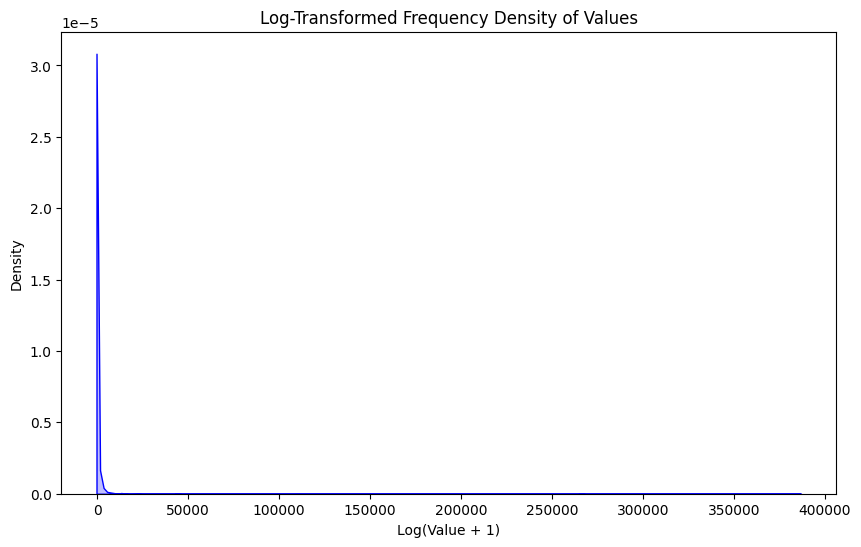

In [30]:
# 将所有的词频保存成列表，绘制频率分布图
all_freq = list(word_counts.values())
all_freq.sort()

import matplotlib.pyplot as plt
import seaborn as sns

# 绘制直方图
# 绘制概率密度图
plt.figure(figsize=(10, 6))
sns.kdeplot(all_freq, color='blue', fill=True)
plt.title('Log-Transformed Frequency Density of Values')
plt.xlabel('Log(Value + 1)')
plt.ylabel('Density')
plt.grid(False)
plt.show()

In [31]:
from collections import defaultdict, Counter

class Vocab:
    """
    可以同时接纳Token和text两种类型的数据
    对原始文字数据，调用build方法，进行分词、完成预处理、完成词频筛选
    对Token数据，使用init中的流程，完成添加未知词、词汇表构建并根据词汇表进行编码
    建好词汇表后，再调用单独的方法来进行编码
    """
    def __init__(self, tokens=None):
        self.idx_to_token = list()
        self.token_to_idx = dict()

        if tokens is not None:
            if "<unk>" not in tokens:
                tokens = ["<unk>"] + tokens 
            if "<sos>" not in tokens:
                tokens = ["<sos>"] + tokens
            if "<eos>" not in tokens:
                tokens = ["<eos>"] + tokens
            for token in tokens:
                self.idx_to_token.append(token)
                self.token_to_idx[token] = len(self.idx_to_token) - 1
            self.unk = self.token_to_idx['<unk>']

    @classmethod

    def build(cls, text
              , min_freq = 1
              , stopwords = set(["的", "和", "了", "在", "是", "就", "不", "也", "有", "但"])
              , preprocessing=False
              , reserved_tokens=None):
        token_freqs = defaultdict(int)
        for tokens in text:
            if preprocessing:
                #去除标点符号
                tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens]
                #去除停用词
                tokens = [token for token in tokens if token and token not in stopwords]
            #词频筛选
            for token in tokens:
                token_freqs[token] += 1
        uniq_tokens = ["<unk>", "<sos>", "<eos>"] + (reserved_tokens if reserved_tokens else [])
        uniq_tokens += [token for token, freq in token_freqs.items() if freq >= min_freq and token != "<unk>"]
        return cls(uniq_tokens)

    def __len__(self):
        return len(self.idx_to_token)

    def __getitem__(self, token):
        return self.token_to_idx.get(token, self.unk)

    def convert_tokens_to_ids(self, tokens):
        return [self[token] for token in tokens]

    def convert_ids_to_tokens(self, indices):
        return [self.idx_to_token[index] for index in indices]

In [32]:
vocab = Vocab.build(chunks,min_freq=1
                   ,preprocessing = False
                   )

In [33]:
ordinal_token = []
for tokens in chunks:
    ordinal_token.append(vocab.convert_tokens_to_ids(tokens))

In [34]:
cal = calculate_stats(ordinal_token)
cal.stats()

总字数: 4896774
样本数量: 9565
平均每篇文章的字数: 511.94709879769994
最长句子的字数:512
最短句子的字数:6
句子长度的25%分位数:512.0
句子长度的50%分位数:512.0
句子长度的75%分位数:512.0
句子长度的90%分位数:512.0


- **生成式算法/Decoder-Only结构中的数据导入**

在数据进入Pytorch之前，我们通常需要将数据进行如下的处理——

1. **将数据转变为与PyTorch兼容的结构**，包括但不限于：
> - 确保数据集拥有`__len__` 方法（返回数据集大小）和 `__getitem__` 方法（根据索引返回数据）。<br><br>
> - 数据应该是 `torch.Tensor` 类型，因为 PyTorch 的大部分操作都是针对张量进行的。如果数据是其他格式（如 NumPy 数组、Pandas DataFrame 等），需要将其转换为 PyTorch 张量。<br><br>
> - 数据各类预处理：在加载数据之前需要进行归一化或其他基础的预处理操作，以确保数据适合训练，可以在 `__getitem__` 方法中添加这些预处理操作。

2. **经过DataLoader对数据完成进一步的处理**，包括但不限于：
> - 完成batch分割，将数据集转变为特定神经网络能够接纳的格式<br><br>
> - 完成padding、裁剪、类型转换等奖数据变得更整齐的预处理操作

In [50]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence

In [51]:
#兼容Pytorch，我们使用继承自Dataset的类
class TransformerDataset(Dataset):
    def __init__(self, data):
        # 初始化数据集，将传入的数据保存在实例变量data中
        self.data = data

    def __len__(self):
        # 返回数据集的大小
        return len(self.data)

    def __getitem__(self, i):
        # 根据索引i获取数据集中的第i个样本
        return self.data[i]

In [52]:
# 定义collate_fn函数，用于在DataLoader中对一个batch的数据进行处理
def collate_fn(examples):
    # 将每个样本的输入部分转换为张量
    seq = [torch.tensor(ex) for ex in examples]
    y_true = [torch.tensor(ex[1:] + [0]) for ex in examples]
    
    # pytorch自带的padding工具
    # 对batch内的样本进行padding，使其具有相同长度
    seq = pad_sequence(seq, batch_first=True)
    y_true = pad_sequence(y_true, batch_first=True)
    
    # 返回处理后的输入和目标
    return seq, y_true

> - **灵魂拷问：Decoder-Only架构所需的数据输入是什么样子？**

<center><img src="https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/transformer/image-1.png" alt="描述文字" width="400">

几个关键事实：

1) 与完整的Transformer不同，Decoder-only结构的输入没有memory，只有标签outputs（在pytorch的代码中一般写作tgt，但极易与损失函数使用的标签所混淆）

2) Decoder-Only结构训练的时候是teacher forcing，测试的时候是autoregressive，因此不分特征标签、不分训练集测试集，只有一个序列seq。

In [ ]:
之前讲解过多次，Decoder-Only的结构中预测模式是：

训练——（teacher forcing - 不会累计错误）

这 👉 xxx1

这是 👉 xxx2

这是最 👉 xxx3

这是最好 👉 xxx4

测试——（autoregressive - 累计错误）

这是最坏的时代 👉 xxx1

这是最坏的时代，xxx1 👉 xxx2

这是最坏的时代，xxx1 xxx2 👉 xxx3

那seq是什么结构呢？**在embedding之前，是（batch_size，seq_len），就像现在我们得到的ordinal_token一样**。在embedding之后，是（batch_size，seq_len，input_dimension），就是transformer所需要的输入数据格式。

In [53]:
print(ordinal_token[0],"\n \n",ordinal_token[1],"\n \n",ordinal_token[2])

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 4, 16, 17, 18, 19, 20, 21, 22, 23, 24, 4, 25, 26, 27, 28, 6, 7, 10, 29, 30, 8, 31, 32, 33, 34, 35, 36, 37, 31, 38, 39, 24, 8, 40, 41, 42, 43, 44, 45, 24, 46, 47, 48, 49, 50, 51, 52, 53, 35, 54, 24, 55, 56, 57, 58, 59, 60, 61, 62, 33, 63, 8, 64, 54, 24, 65, 66, 67, 68, 61, 24, 69, 70, 51, 71, 10, 72, 73, 74, 24, 75, 48, 76, 18, 77, 20, 78, 60, 79, 57, 24, 80, 81, 82, 83, 24, 84, 85, 86, 87, 88, 89, 31, 8, 90, 48, 91, 92, 31, 32, 51, 93, 33, 94, 46, 95, 96, 31, 10, 97, 98, 48, 91, 32, 99, 100, 24, 96, 67, 101, 31, 47, 24, 102, 8, 103, 104, 105, 106, 107, 108, 6, 109, 110, 11, 108, 6, 109, 111, 112, 113, 110, 11, 108, 114, 109, 110, 115, 3, 116, 117, 118, 119, 11, 120, 121, 27, 122, 123, 124, 125, 126, 4, 16, 127, 128, 17, 18, 129, 20, 24, 130, 131, 132, 133, 24, 48, 134, 35, 135, 31, 136, 39, 24, 137, 138, 139, 140, 24, 141, 120, 142, 97, 143, 35, 121, 33, 140, 144, 145, 146, 147, 148, 149, 24, 150, 137, 151, 152, 153, 154, 24, 155, 122, 24, 

3) dataloader需要整理的不止是Decoder-only结构本身需要的数据，而是整个训练过程中必备的数据。因此除了准备架构的输入之外，还要考虑在计算损失过程中必须的真实标签y_true。那真实标签y_true是什么结构呢？

In [ ]:
依据现在的数据结构，我们的序列长度seq_len为512，因此Decoder-Only架构的训练模式是：

这 👉 xxx1
[0]    [1]

这是 👉 xxx2
[0,1]    [2]

这是最 👉 xxx3
[0,1,2]    [3]

这是最好 👉 xxx4
[0,1,2,3]    [4]

以此类推……

因此在Decoder的训练过程中，我们是依据“逐渐变长的句子前半段”来预测“句子的下一个字”。奇妙的是，虽然大部分人会认为上面的过程是按顺序逐渐发生的，但在Decoder架构中上述所有预测是同步进行的，且在Transformer的计算流程中，**上述的每一次预测都是一个样本**：

In [ ]:
样本1:
这 👉 xxx1
[0]    [1]

样本2:
这是 👉 xxx2
[0,1]    [2]

样本3:
这是最 👉 xxx3
[0,1,2]    [3]

样本4:
这是最好 👉 xxx4
[0,1,2,3]    [4]

输入数据是——

<table>
<tr>
  <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
</tr>
<tr>
  <td>0</td><td>"sos"</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
</tr>
<tr>
  <td>1</td><td>这</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
</tr>
<tr>
  <td>2</td><td>是</td><td>0.1721</td><td>0.5030</td><td>0.8948</td><td>0.2385</td><td>0.0987</td>
</tr>
<tr>
  <td>3</td><td>最好的</td><td>0.1342</td><td>0.8297</td><td>0.2978</td><td>0.7120</td><td>0.2565</td>
</tr>
<tr>
  <td>4</td><td>时代</td><td>0.1248</td><td>0.5003</td><td>0.7559</td><td>0.4804</td><td>0.2593</td>
</tr>
</table>

然而，从Decoder的掩码注意力层中输出的是**经过掩码后**、每一行只携带特定时间段信息的结果$C_{decoder}$：

$$
C_{decoder} = \begin{bmatrix}
c_{0} & c_{0} & \ldots & c_{0} \\
c_{0 \to 1} & c_{0 \to 1} & \ldots & c_{0 \to 1} \\
c_{0 \to 1} & c_{0 \to 2} & \ldots & c_{0 \to 2} \\
c_{0 \to 3} & c_{0 \to 3} & \ldots & c_{0 \to 3} \\
c_{0 \to 4} & c_{0 \to 4} & \ldots & c_{0 \to 4} \\
&……
\end{bmatrix}
$$

<font color="red">**这里出于教学目的，省略了特征维度上的脚标。现在你所看到的脚标只代表时间维度/序列长度的维度。**

从注意力机制中输出的每行数据、就代表了一个“逐渐变长的句子前半段”，因此每行数据也就对应着一个标签。故而在下面的流程中，真实标签就是[1,2,3,4]这样的序列，也就是原始序列seq[1:] + [0]。

In [54]:
#兼容Pytorch，我们使用继承自Dataset的类
class TransformerDataset(Dataset):
    def __init__(self, data):
        # 初始化数据集，将传入的数据保存在实例变量data中
        self.data = data

    def __len__(self):
        # 返回数据集的大小
        return len(self.data)

    def __getitem__(self, i):
        # 根据索引i获取数据集中的第i个样本
        return self.data[i]

In [55]:
# 定义collate_fn函数，用于在DataLoader中对一个batch的数据进行处理
def collate_fn(examples):
    # 将每个样本的输入部分转换为张量
    seq = [torch.tensor(ex) for ex in examples]
    y_true = [torch.tensor(ex[1:] + [0]) for ex in examples]
    
    # pytorch自带的padding工具
    # 对batch内的样本进行padding，使其具有相同长度
    seq = pad_sequence(seq, batch_first=True)
    y_true = pad_sequence(y_true, batch_first=True)
    
    # 返回处理后的输入和目标
    return seq, y_true

In [56]:
batch_size = 32

dataset = TransformerDataset(ordinal_token)  # 创建数据集
dataloader = DataLoader(dataset
                        , batch_size=batch_size
                        , drop_last = False
                        , collate_fn=collate_fn
                        , shuffle=False)  # 创建训练数据加载器

In [57]:
for x in dataset:
    print(x[:100])
    break

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 4, 16, 17, 18, 19, 20, 21, 22, 23, 24, 4, 25, 26, 27, 28, 6, 7, 10, 29, 30, 8, 31, 32, 33, 34, 35, 36, 37, 31, 38, 39, 24, 8, 40, 41, 42, 43, 44, 45, 24, 46, 47, 48, 49, 50, 51, 52, 53, 35, 54, 24, 55, 56, 57, 58, 59, 60, 61, 62, 33, 63, 8, 64, 54, 24, 65, 66, 67, 68, 61, 24, 69, 70, 51, 71, 10, 72, 73, 74, 24, 75, 48, 76, 18, 77, 20, 78]


In [58]:
for batch in dataloader:
    print(batch,"\n\n") # 第一个batch中的实际数据，包括需要输入的seq与标签y_true
    print("seq: \n", batch[0],"\n\n") #seq，结构为(batch_size, seq_len)
    print(batch[0].shape,"\n\n")
    print("y_true: \n", batch[1],"\n\n") #y_true，结构也为(batch_size,seq_len)
    print(batch[1].shape)
    break

(tensor([[   3,    4,    5,  ...,  259,   31,  138],
        [  24,  260,  147,  ...,   24,  263,  201],
        [ 203,  421,   24,  ...,  546,   72,  165],
        ...,
        [  24, 3256,   31,  ...,  366, 3349,   24],
        [3350, 1142,  218,  ..., 3262,  546,  419],
        [  97,  177, 3409,  ..., 3215,  479,  600]]), tensor([[   4,    5,    6,  ...,   31,  138,    0],
        [ 260,  147,  233,  ...,  263,  201,    0],
        [ 421,   24,  150,  ...,   72,  165,    0],
        ...,
        [3256,   31,  445,  ..., 3349,   24,    0],
        [1142,  218, 3268,  ...,  546,  419,    0],
        [ 177, 3409,   33,  ...,  479,  600,    0]])) 


seq: 
 tensor([[   3,    4,    5,  ...,  259,   31,  138],
        [  24,  260,  147,  ...,   24,  263,  201],
        [ 203,  421,   24,  ...,  546,   72,  165],
        ...,
        [  24, 3256,   31,  ...,  366, 3349,   24],
        [3350, 1142,  218,  ..., 3262,  546,  419],
        [  97,  177, 3409,  ..., 3215,  479,  600]]) 


torch.

对生成式算法而言，我们不分训练集与测试集，同时我们也不分特征和标签，因为我们是用句子的前半段去预测句子的后半段。在生成式任务中，比如文本生成或语言模型训练，常常采用自回归模型（autoregressive model）来逐步预测序列中的下一个元素。这种情况下，通常不需要明确地划分训练集和测试集，而是通过给定的序列前半部分来预测后半部分，从而进行训练和评估。